# Machine learning churn project

## Dataset Link
- https://www.kaggle.com/datasets/saurabhbadole/bank-customer-churn-prediction-dataset

## Imports

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score,RandomizedSearchCV
from sklearn.metrics import accuracy_score,roc_curve, auc,classification_report


## Data extraction

In [21]:
df_churn=pd.read_csv('Churn_Modelling.csv')
display(df_churn.head())
print(df_churn.info())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


## Features Description

- **RowNumber**: The sequential number assigned to each row in the dataset.
- **CustomerId**: A unique identifier for each customer.
- **Surname**: The surname of the customer.
- **CreditScore**: The credit score of the customer.
- **Geography**: The geographical location of the customer (e.g., country or region).
- **Gender**: The gender of the customer.
- **Age**: The age of the customer.
- **Tenure**: The number of years the customer has been with the bank.
- **Balance**: The account balance of the customer.
- **NumOfProducts**: The number of bank products the customer has.
- **HasCrCard**: Indicates whether the customer has a credit card (binary: yes/no).
- **IsActiveMember**: Indicates whether the customer is an active member (binary: yes/no).
- **EstimatedSalary**: The estimated salary of the customer.
- **Exited**: Indicates whether the customer has exited the bank (binary: yes/no).


In [23]:
df_churn.rename(columns={'Geography': 'Country'},inplace=True)

## Descriptive Analysis

In [25]:
df_churn.loc[:,~df_churn.columns.isin(['RowNumber','CustomerId','Surname','Country','Gender','HasCrCard','IsActiveMember','Exited'])].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


### Age 

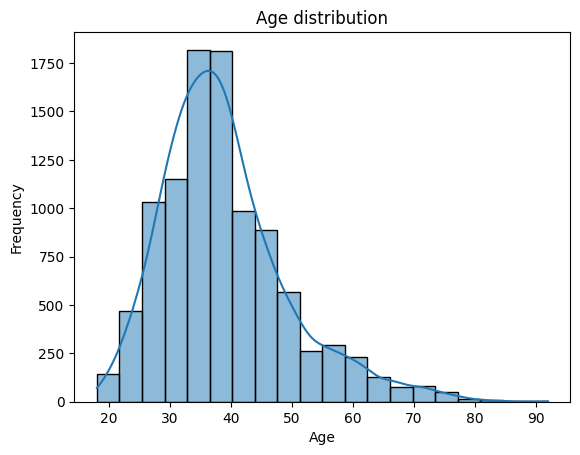

In [27]:
sns.histplot(x='Age', data=df_churn, kde=True, bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution')

plt.show()

### Age vs Account Balance

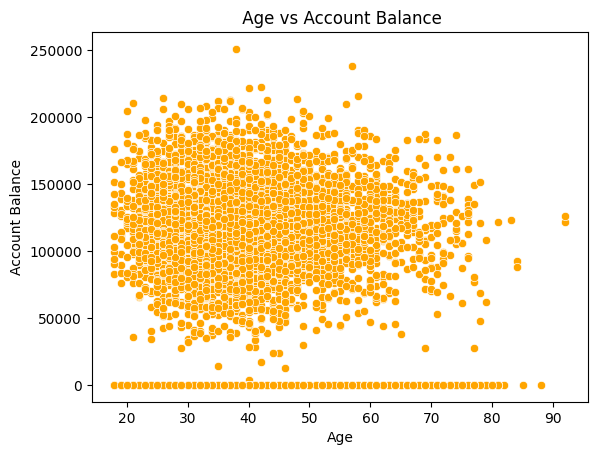

In [29]:
sns.scatterplot(x='Age', y='Balance', data=df_churn, color='orange')
plt.title(' Age vs Account Balance')
plt.xlabel('Age')
plt.ylabel('Account Balance')
plt.show()


### Tenure

C:\Users\PC\AppData\Local\Temp\ipykernel_12176\8407360.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Tenure', data=df_churn, palette='muted')


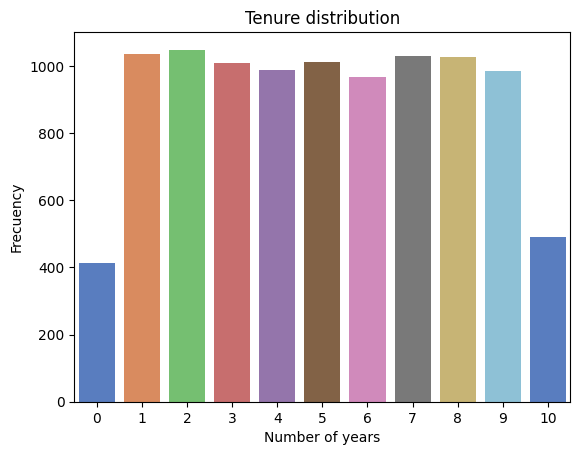

In [31]:
sns.countplot(x='Tenure', data=df_churn, palette='muted')
plt.title('Tenure distribution')
plt.xlabel('Number of years')
plt.ylabel('Frecuency')
plt.show()


### Estimated Salary

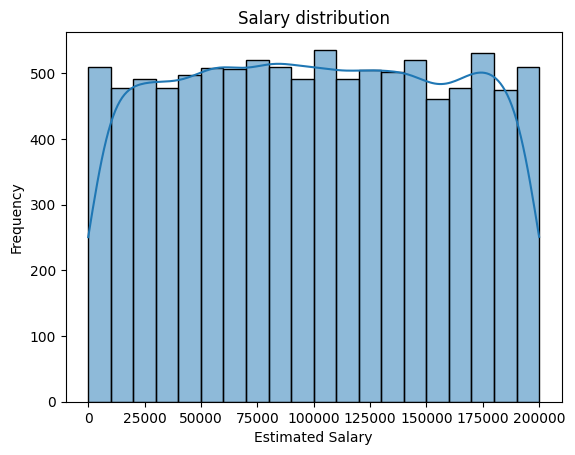

In [33]:
sns.histplot(x='EstimatedSalary', data=df_churn, kde=True, bins=20)
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.title('Salary distribution')

plt.show()

### Credit Scores 

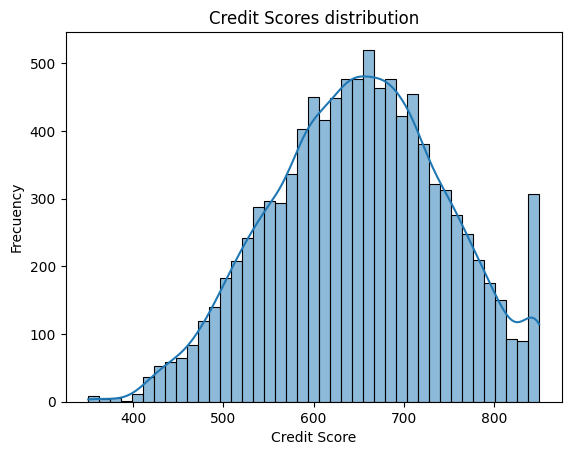

In [35]:
sns.histplot(x='CreditScore', data=df_churn, kde=True,)
plt.title('Credit Scores distribution')
plt.xlabel('Credit Score')
plt.ylabel('Frecuency')
plt.show()


### Account Balance

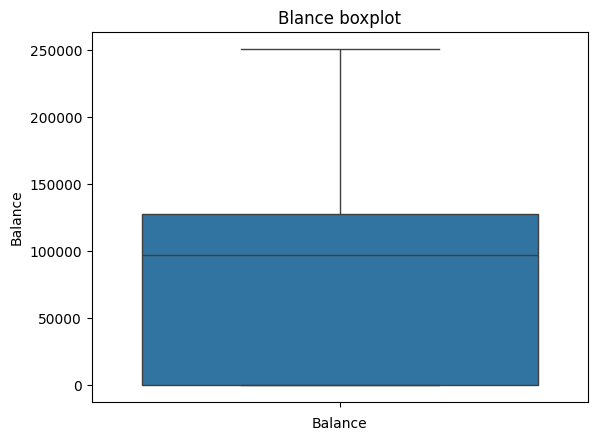

In [37]:
sns.boxplot(y='Balance', data=df_churn)
plt.title('Blance boxplot')
plt.xlabel('Balance')
plt.show()


### Number of products 

C:\Users\PC\AppData\Local\Temp\ipykernel_12176\3560835406.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NumOfProducts', data=df_churn, palette='muted')


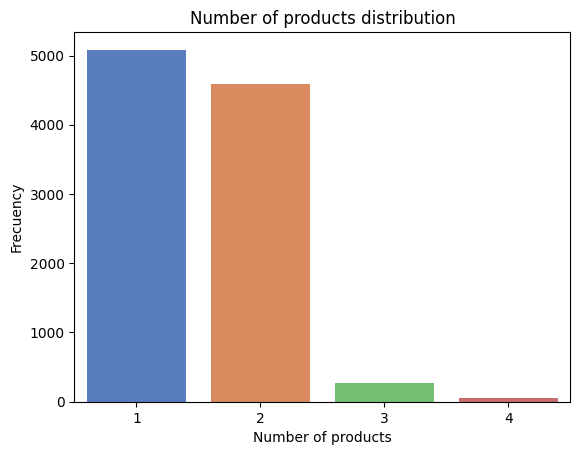

In [39]:
sns.countplot(x='NumOfProducts', data=df_churn, palette='muted')
plt.title('Number of products distribution')
plt.xlabel('Number of products')
plt.ylabel('Frecuency')
plt.show()


### Active Member

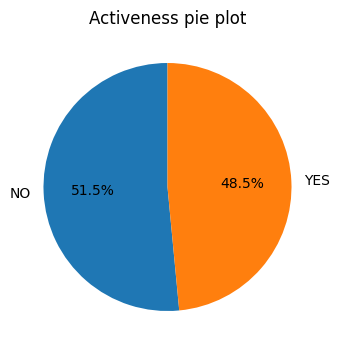

In [45]:
gender_counts = df_churn['IsActiveMember'].value_counts()

plt.figure(figsize=(4, 5))
plt.pie(gender_counts, labels=['NO','YES'], autopct='%1.1f%%', startangle=90)
plt.title('Activeness pie plot')
plt.show()

### Country

C:\Users\PC\AppData\Local\Temp\ipykernel_12176\4192362078.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Country', data=df_churn, palette='Set2')


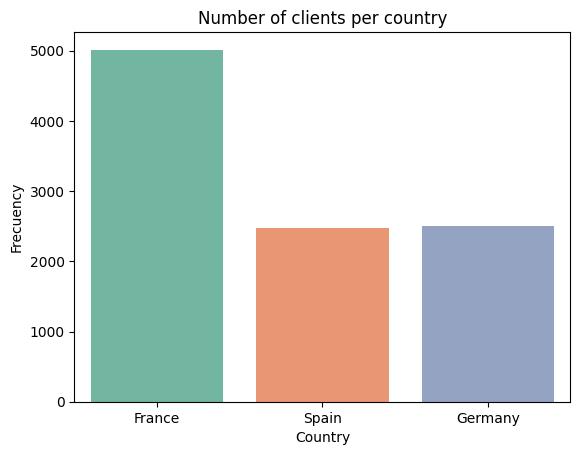

In [50]:
sns.countplot(x='Country', data=df_churn, palette='Set2')
plt.title('Number of clients per country')
plt.xlabel('Country')
plt.ylabel('Frecuency')
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_12176\3931618211.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='Age', data=df_churn, palette='Set2')


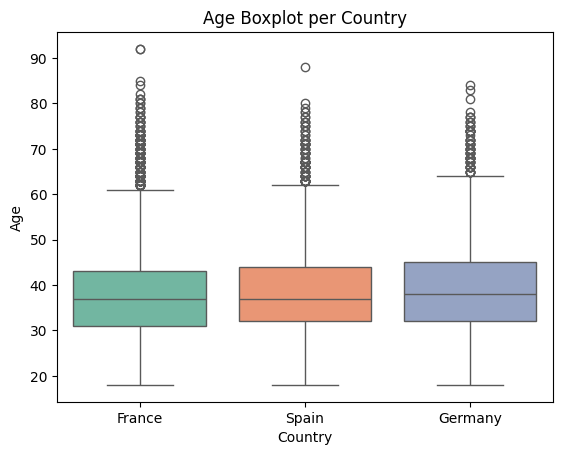

In [52]:
sns.boxplot(x='Country', y='Age', data=df_churn, palette='Set2')
plt.title('Age Boxplot per Country')
plt.xlabel('Country')
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_12176\3993321366.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='Tenure', data=df_churn, palette='Set2')


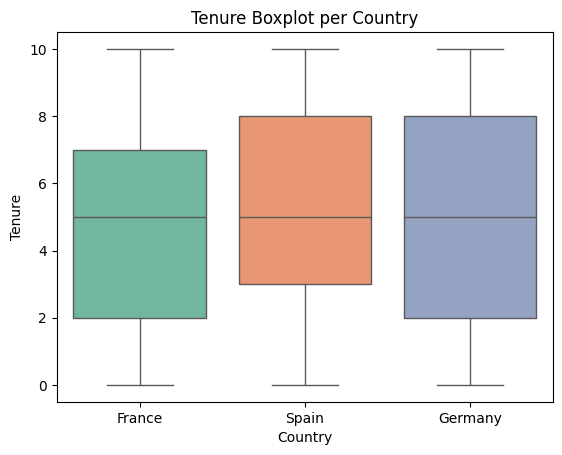

In [55]:
sns.boxplot(x='Country', y='Tenure', data=df_churn, palette='Set2')
plt.title('Tenure Boxplot per Country')
plt.xlabel('Country')
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_12176\3512196900.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='Balance', data=df_churn, palette='Set2')


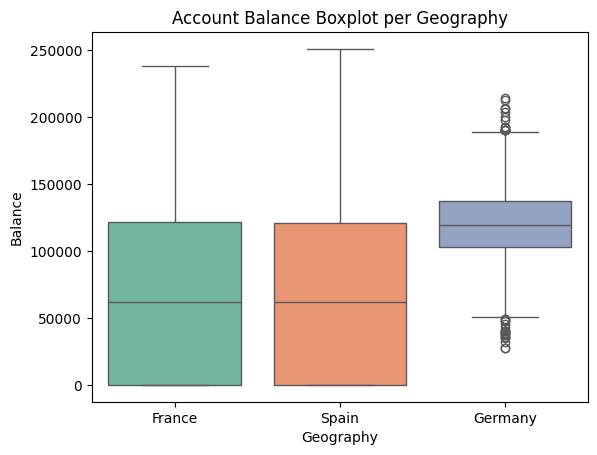

In [58]:
sns.boxplot(x='Country', y='Balance', data=df_churn, palette='Set2')
plt.title('Account Balance Boxplot per Geography')
plt.xlabel('Geography')
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_12176\109725769.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='EstimatedSalary', data=df_churn, palette='Set2')


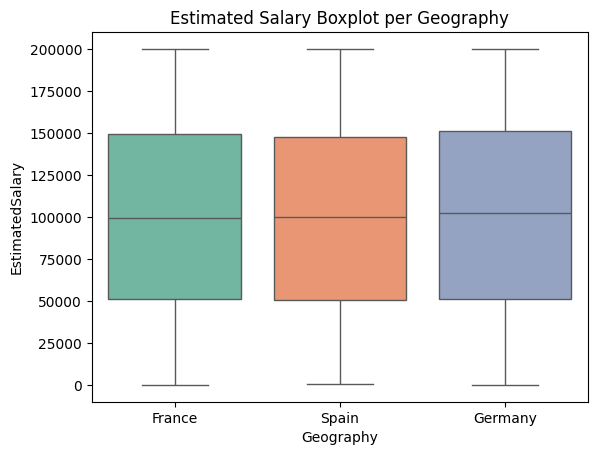

In [61]:
sns.boxplot(x='Country', y='EstimatedSalary', data=df_churn, palette='Set2')
plt.title('Estimated Salary Boxplot per Geography')
plt.xlabel('Geography')
plt.show()

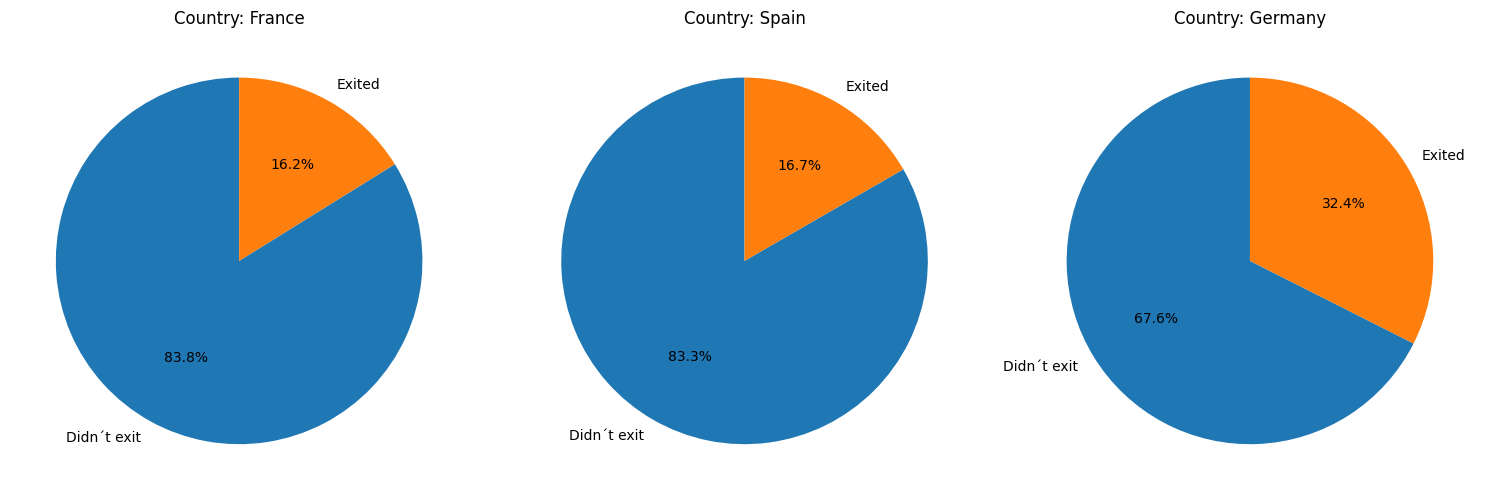

In [63]:
geographies = df_churn['Country'].unique()

fig, axes = plt.subplots(1, len(geographies), figsize=(15, 5))

for i, geo in enumerate(geographies):
    geo_data = df_churn[df_churn['Country'] == geo]

    exit_counts = geo_data['Exited'].value_counts()
    axes[i].pie(exit_counts, labels=['Didn´t exit', 'Exited'], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Country: {geo}')

plt.tight_layout()
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_12176\3509341482.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NumOfProducts', data=geo_data, palette='muted', ax=axes[i])
C:\Users\PC\AppData\Local\Temp\ipykernel_12176\3509341482.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NumOfProducts', data=geo_data, palette='muted', ax=axes[i])
C:\Users\PC\AppData\Local\Temp\ipykernel_12176\3509341482.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NumOfProducts', data=geo_data, palette='muted', ax=axes[i])


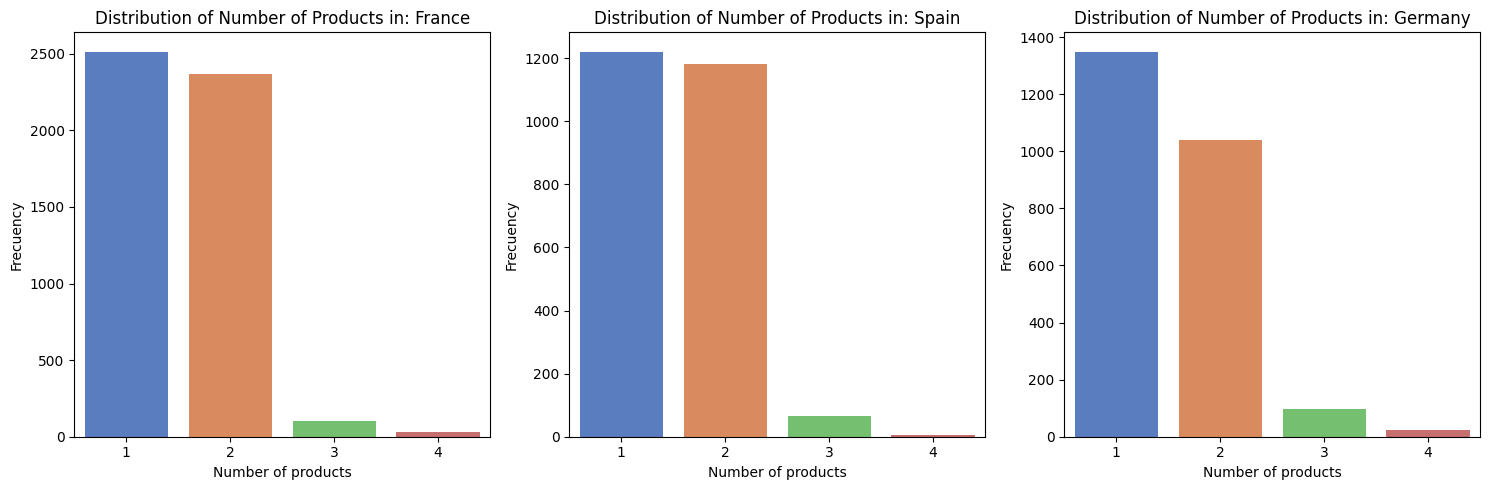

In [65]:
geographies = df_churn['Country'].unique()

fig, axes = plt.subplots(1, len(geographies), figsize=(15, 5))

for i, geo in enumerate(geographies):
    geo_data = df_churn[df_churn['Country'] == geo]
    
    sns.countplot(x='NumOfProducts', data=geo_data, palette='muted', ax=axes[i])
    axes[i].set_title(f'Distribution of Number of Products in: {geo}')
    axes[i].set_xlabel('Number of products')
    axes[i].set_ylabel('Frecuency')

plt.tight_layout()
plt.show()


### Gender

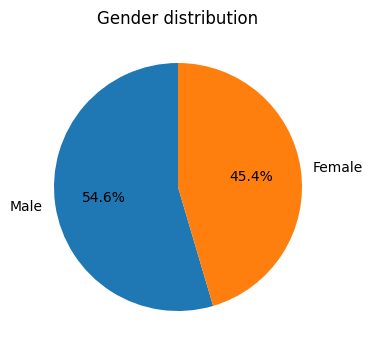

In [70]:
gender_counts = df_churn['Gender'].value_counts()

plt.figure(figsize=(4, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Gender distribution')

plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_12176\1343946539.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Age', data=df_churn, palette='Set2')


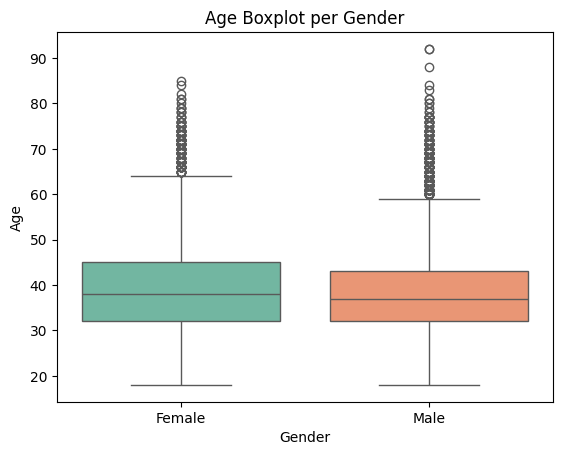

In [72]:
sns.boxplot(x='Gender', y='Age', data=df_churn, palette='Set2')
plt.title('Age Boxplot per Gender')
plt.xlabel('Gender')
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_12176\1923466644.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Tenure', data=df_churn, palette='Set2')


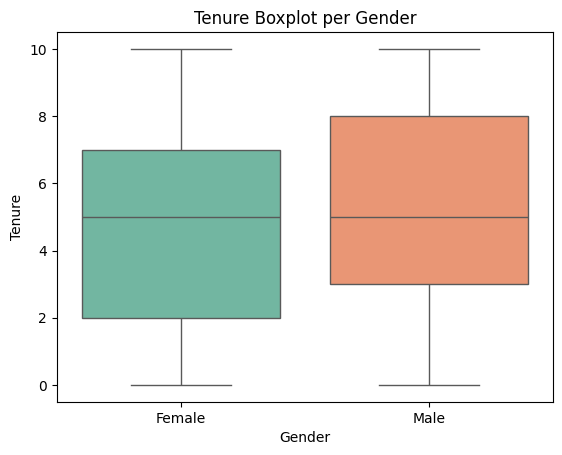

In [74]:
sns.boxplot(x='Gender', y='Tenure', data=df_churn, palette='Set2')
plt.title('Tenure Boxplot per Gender')
plt.xlabel('Gender')
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_12176\2451153047.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Balance', data=df_churn, palette='Set2')


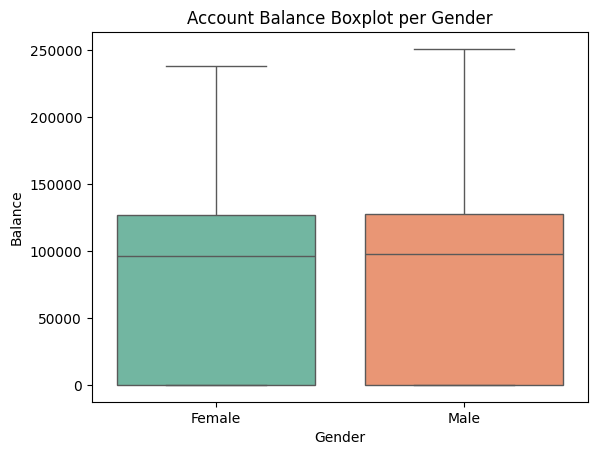

In [76]:
sns.boxplot(x='Gender', y='Balance', data=df_churn, palette='Set2')
plt.title('Account Balance Boxplot per Gender')
plt.xlabel('Gender')
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_12176\651213327.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='EstimatedSalary', data=df_churn, palette='Set2')


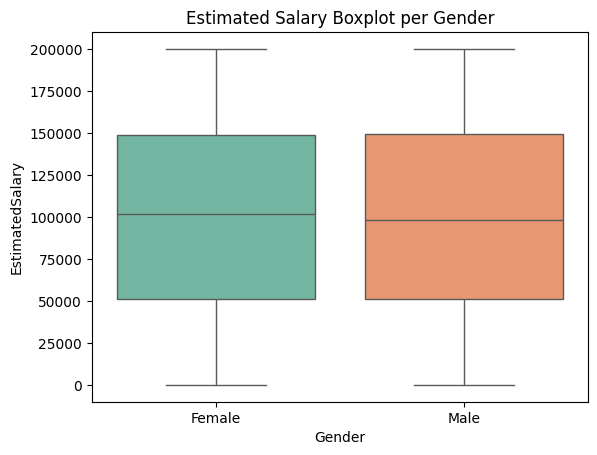

In [78]:
sns.boxplot(x='Gender', y='EstimatedSalary', data=df_churn, palette='Set2')
plt.title('Estimated Salary Boxplot per Gender')
plt.xlabel('Gender')
plt.show()

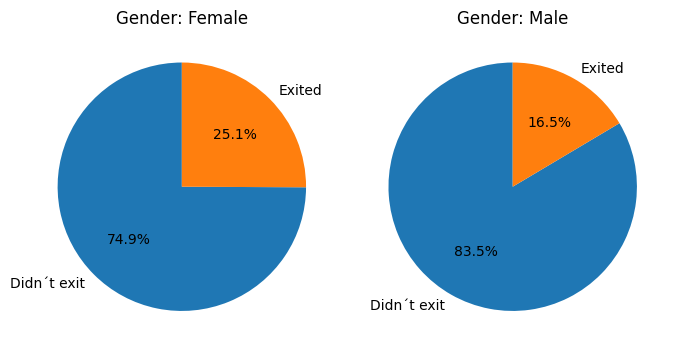

In [80]:
genders = df_churn['Gender'].unique()

fig, axes = plt.subplots(1, len(genders), figsize=(7, 5))

for i, gen in enumerate(genders):
    gen_data = df_churn[df_churn['Gender'] == gen]

    exit_counts = gen_data['Exited'].value_counts()
    axes[i].pie(exit_counts, labels=['Didn´t exit', 'Exited'], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Gender: {gen}')

plt.tight_layout()
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_12176\15523183.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NumOfProducts', data=geo_data, palette='muted', ax=axes[i])
C:\Users\PC\AppData\Local\Temp\ipykernel_12176\15523183.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NumOfProducts', data=geo_data, palette='muted', ax=axes[i])


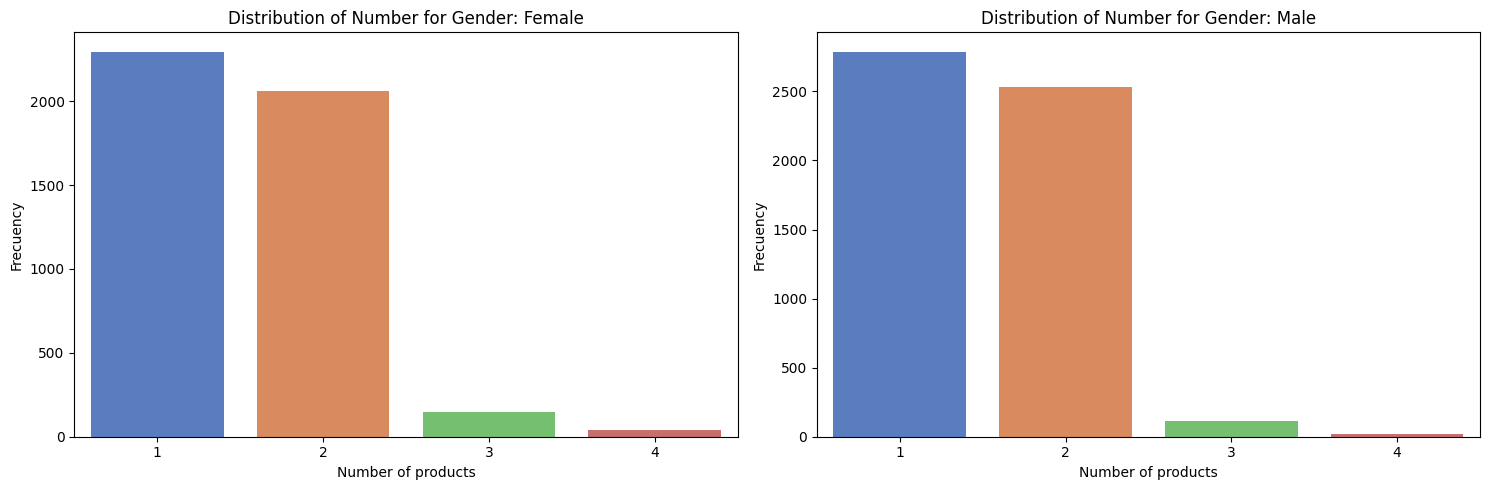

In [82]:
genders = df_churn['Gender'].unique()

fig, axes = plt.subplots(1, len(genders), figsize=(15, 5))

for i, gen in enumerate(genders):
    geo_data = df_churn[df_churn['Gender'] == gen]
    
    sns.countplot(x='NumOfProducts', data=geo_data, palette='muted', ax=axes[i])
    axes[i].set_title(f'Distribution of Number for Gender: {gen}')
    axes[i].set_xlabel('Number of products')
    axes[i].set_ylabel('Frecuency')

plt.tight_layout()
plt.show()


### Exited

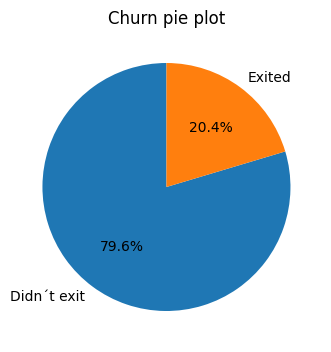

In [85]:
exited_counts = df_churn['Exited'].value_counts()

plt.figure(figsize=(4, 5))
plt.pie(exited_counts, labels=['Didn´t exit', 'Exited'], autopct='%1.1f%%', startangle=90)
plt.title('Churn pie plot')
plt.show()

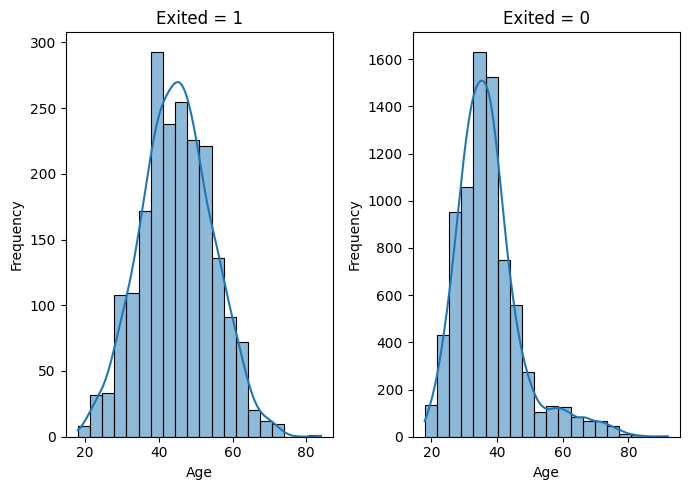

In [87]:
exited = df_churn['Exited'].unique()

fig, axes = plt.subplots(1, len(exited), figsize=(7, 5))

for i, ex in enumerate(exited):
    ex_data = df_churn[df_churn['Exited'] == ex]
    sns.histplot(ax=axes[i],x='Age', data=ex_data, kde=True, bins=20)
    axes[i].set_title(f"Exited = {ex}")
    axes[i].set_xlabel("Age")
    axes[i].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_12176\3711614855.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Age', data=df_churn, palette='Set2')


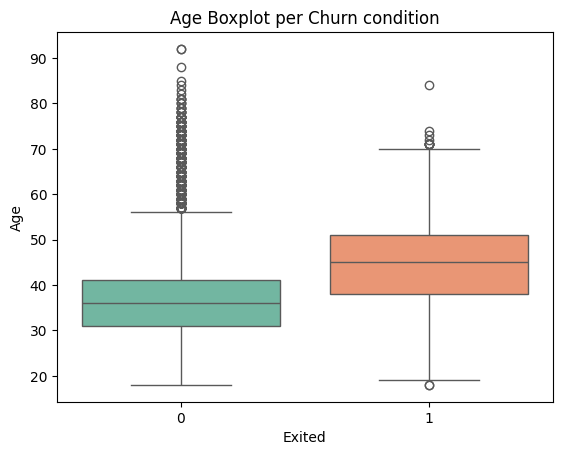

In [88]:
sns.boxplot(x='Exited', y='Age', data=df_churn, palette='Set2')
plt.title('Age Boxplot per Churn condition')
plt.xlabel('Exited')
plt.show()

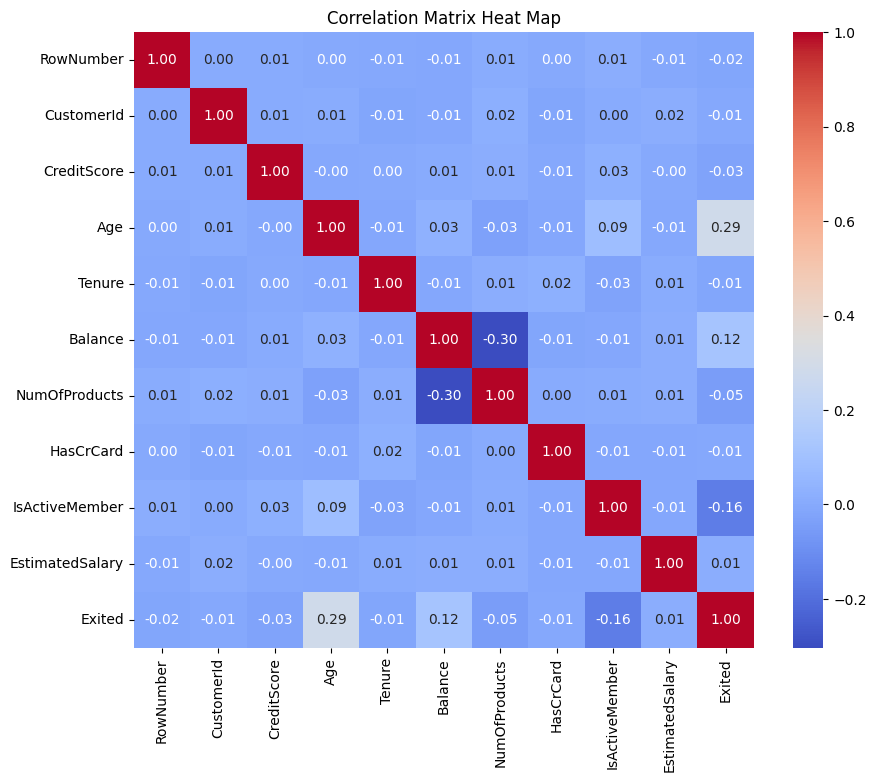

In [91]:
correlation_matrix = df_churn.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heat Map')
plt.show()


## Machine Learning Model

### Data preprocessing

In [95]:
df_churn_ml=df_churn.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
df_churn_ml = pd.get_dummies(df_churn_ml, columns=['Country'])
df_churn_ml = pd.get_dummies(df_churn_ml, columns=['Gender'])
df_churn_ml['HasCrCard'] = df_churn_ml['HasCrCard'].astype(int)
df_churn_ml['IsActiveMember'] = df_churn_ml['IsActiveMember'].astype(int)
df_churn_ml[['Country_France','Country_Germany','Country_Spain','Gender_Female','Gender_Male']]=df_churn_ml[['Country_France','Country_Germany','Country_Spain','Gender_Female','Gender_Male']].astype(int)
display(df_churn_ml.head())
#display(df_churn_ml.columns)
#print(df_churn_ml.dtypes)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Country_France,Country_Germany,Country_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [97]:
scaler = StandardScaler()
df_churn_ml[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]=scaler.fit_transform(df_churn_ml[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
display(df_churn_ml.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Country_France,Country_Germany,Country_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,1,0,0,1,0
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,0,1,1,0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,1,0,0,1,0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,1,0,0,1,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,0,1,1,0


In [99]:
X=df_churn_ml.drop(columns='Exited')
y=df_churn_ml['Exited']
print(X.shape,y.shape)
print(y.value_counts())

(10000, 13) (10000,)
Exited
0    7963
1    2037
Name: count, dtype: int64


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train size:", X_train.shape, y_train.shape)
print("Test size:", X_test.shape, y_test.shape)

Train size: (8000, 13) (8000,)
Test size: (2000, 13) (2000,)


In [103]:
results = {}

### ML Algorithms

#### Logistic Regresion

In [107]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.20      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



Accuraccy in every fold: [0.804375 0.795    0.81875  0.811875 0.821875]
Mean Accuraccy over the 5 folds: 0.8104

Test Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.20      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



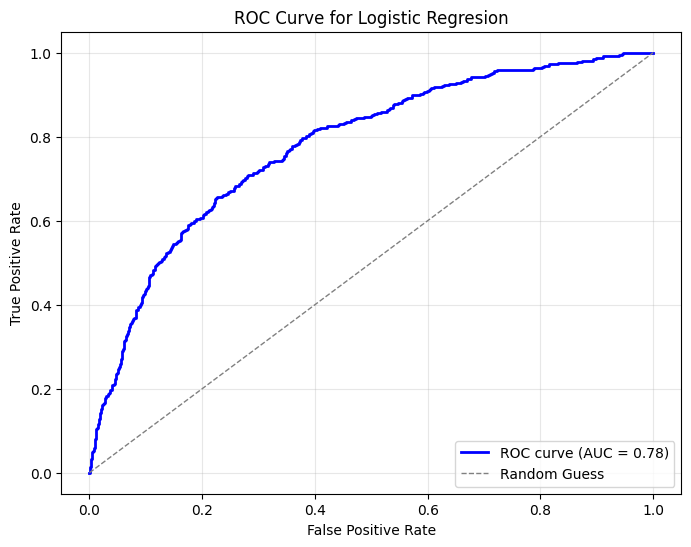

In [109]:
name='Logistic Regresion'
lr = LogisticRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='accuracy')
print(f'Accuraccy in every fold: {scores}')
print(f'Mean Accuraccy over the {len(scores)} folds: {np.mean(scores):.4f}')

lr.fit(X_train, y_train)
y_pred_test = lr.predict(X_test)

print("\nTest Classification Report:")
print(classification_report(y_test, y_pred_test))
classification_rep = classification_report(y_test, y_pred_test, output_dict=True)

results[name] = {
        "Classification Report": classification_rep
    }

y_pred_prob = lr.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {name}')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

#### Decision Tree

Accuraccy in every fold: [0.779375 0.790625 0.796875 0.781875 0.774375]
Mean Accuraccy over the 5 folds: 0.7846

Test Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.45      0.51      0.48       393

    accuracy                           0.78      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.79      0.78      0.78      2000



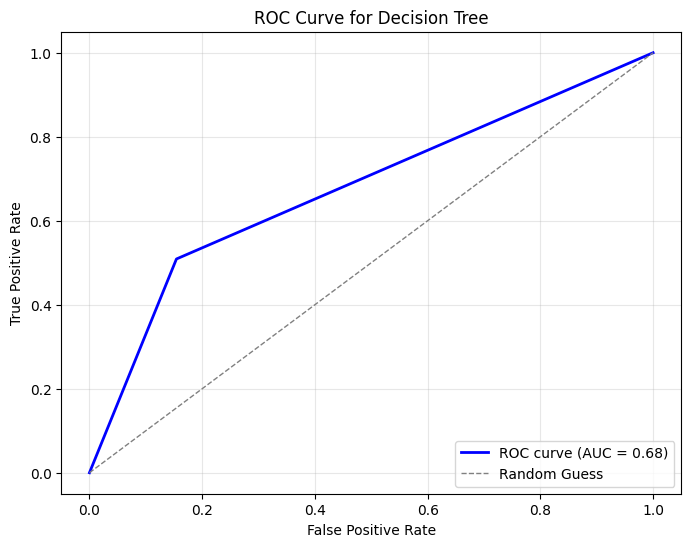

In [112]:
name='Decision Tree'

tree = DecisionTreeClassifier(random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy')
print(f'Accuraccy in every fold: {scores}')
print(f'Mean Accuraccy over the {len(scores)} folds: {np.mean(scores):.4f}')

tree.fit(X_train, y_train)
y_pred_test = tree.predict(X_test)

print("\nTest Classification Report:")
print(classification_report(y_test, y_pred_test))
classification_rep = classification_report(y_test, y_pred_test, output_dict=True)

results[name] = {
        "Classification Report": classification_rep
    }

y_pred_prob = tree.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {name}')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

#### Random Forest

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Users\PC\anaconda3\envs\bank_churn\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best score:  0.866375
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.45      0.56       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



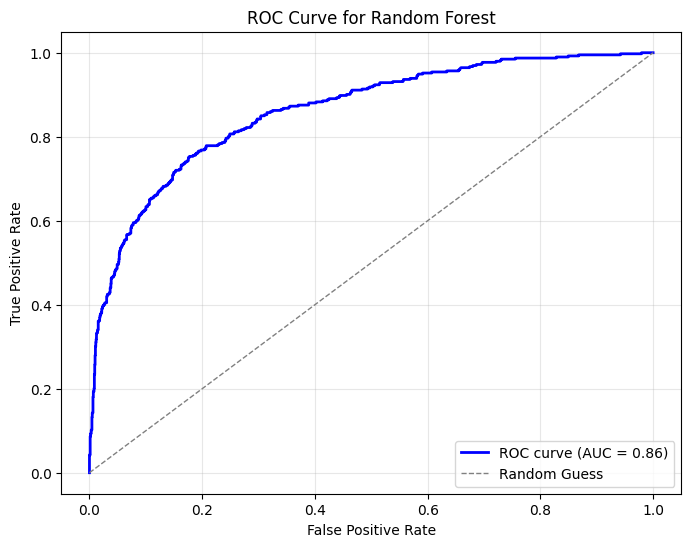

In [115]:
name = 'Random Forest'

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
y_pred_rf_grid = grid_search.predict(X_test)
print(classification_report(y_test, y_pred_rf_grid))
classification_rep = classification_report(y_test, y_pred_test, output_dict=True)

results[name] = {
        "Classification Report": classification_rep
    }

y_pred_prob = grid_search.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {name}')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

#### XGBoost

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.9}
Best score:  0.864625

Test Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.48      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000



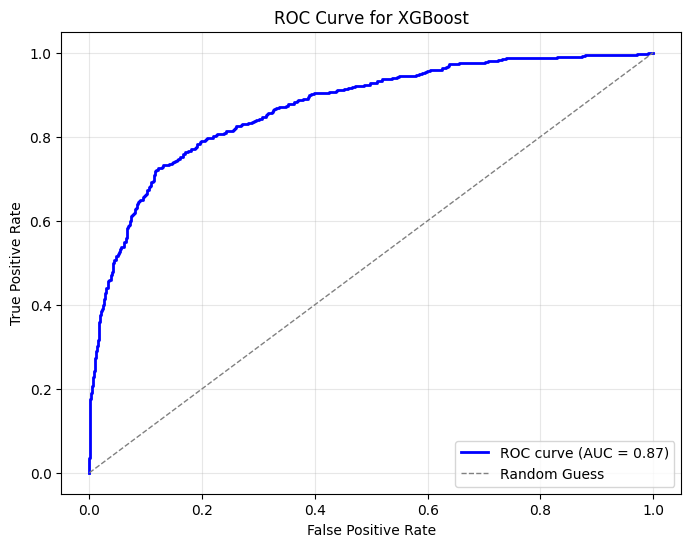

In [117]:
name = 'XGBoost'

xgb_model = xgb.XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

y_pred_xgb_grid = grid_search.predict(X_test)
print("\nTest Classification Report:")
print(classification_report(y_test, y_pred_xgb_grid))

classification_rep = classification_report(y_test, y_pred_xgb_grid, output_dict=True)

results[name] = {
    "Classification Report": classification_rep
}


y_pred_prob = grid_search.predict_proba(X_test)[:, 1]  #
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {name}')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

#### KNN

Accuraccy in every fold: [0.835625 0.834375 0.841875 0.833125 0.833125]
Mean Accuraccy over the 5 folds: 0.8356

Test Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1607
           1       0.64      0.45      0.53       393

    accuracy                           0.84      2000
   macro avg       0.76      0.70      0.72      2000
weighted avg       0.83      0.84      0.83      2000



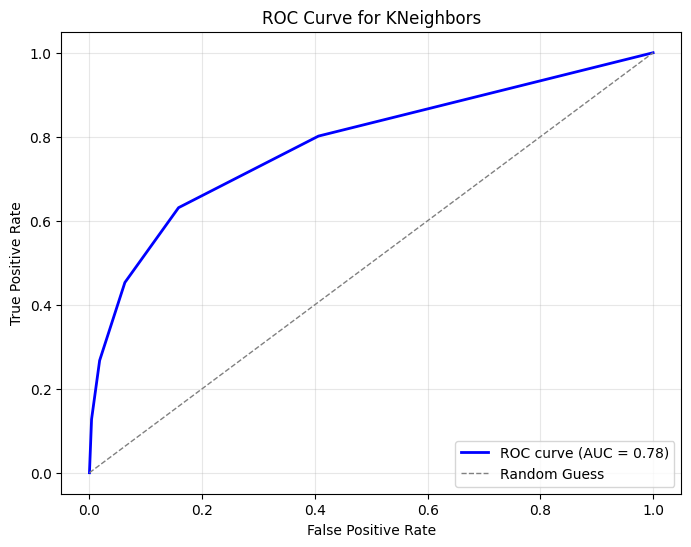

In [119]:
name ='KNeighbors'

knn = KNeighborsClassifier(n_neighbors=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
print(f'Accuraccy in every fold: {scores}')
print(f'Mean Accuraccy over the {len(scores)} folds: {np.mean(scores):.4f}')

knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test)

print("\nTest Classification Report:")
print(classification_report(y_test, y_pred_test))
classification_rep = classification_report(y_test, y_pred_test, output_dict=True)

results[name] = {
        "Classification Report": classification_rep
    }

y_pred_prob = knn.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {name}')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

#### Support Vector Machine

Accuraccy in every fold: [0.87     0.84625  0.8625   0.854375 0.85125 ]
Mean Accuraccy over the 5 folds: 0.8569

Test Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.78      0.40      0.53       393

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.72      2000
weighted avg       0.85      0.86      0.84      2000



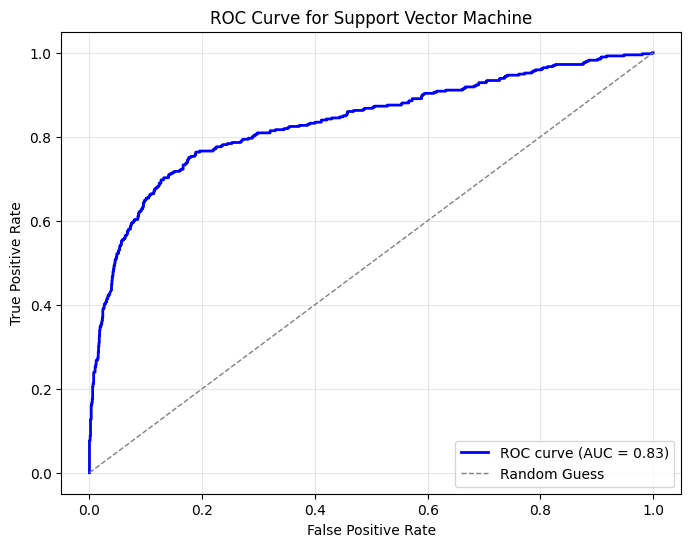

In [121]:
name ='Support Vector Machine'

svm = SVC(probability=True, random_state=42)

scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')
print(f'Accuraccy in every fold: {scores}')
print(f'Mean Accuraccy over the {len(scores)} folds: {np.mean(scores):.4f}')

svm.fit(X_train, y_train)
y_pred_test = svm.predict(X_test)

print("\nTest Classification Report:")
print(classification_report(y_test, y_pred_test))
classification_rep = classification_report(y_test, y_pred_test, output_dict=True)

results[name] = {
        "Classification Report": classification_rep
    }

y_pred_prob = svm.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {name}')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

In [122]:
#print(results.keys())
#print(results.values())

In [128]:
data = []
for model_name, metrics in results.items():
    classification_report_ = metrics["Classification Report"]
    row = {
        "Model": model_name,
        "Accuracy": classification_report_["accuracy"],
        "Macro Precision": classification_report_["macro avg"]["precision"],
        "Macro Recall": classification_report_["macro avg"]["recall"],
        "Macro F1-Score": classification_report_["macro avg"]["f1-score"],
        "Weighted Precision": classification_report_["weighted avg"]["precision"],
        "Weighted Recall": classification_report_["weighted avg"]["recall"],
        "Weighted F1-Score": classification_report_["weighted avg"]["f1-score"],
    }
    data.append(row)

df_results = pd.DataFrame(data)

display(df_results)

,Model,Accuracy,Macro Precision,Macro Recall,Macro F1-Score,Weighted Precision,Weighted Recall,Weighted F1-Score
0,Logistic Regresion,0.8115,0.693670,0.580907,0.593262,0.777030,0.8115,0.774109
1,Decision Tree,0.7795,0.661036,0.677291,0.668012,0.791303,0.7795,0.784791
2,Random Forest,0.7795,0.661036,0.677291,0.668012,0.791303,0.7795,0.784791
3,XGBoost,0.8650,0.812136,0.719923,0.751392,0.855208,0.8650,0.853404
4,KNeighbors,0.8420,0.756533,0.695038,0.717405,0.828486,0.8420,0.831304
5,Support Vector Machine,0.8600,0.823776,0.687017,0.723973,0.851364,0.8600,0.841592


#### MLP

In [130]:
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'max_iter': [200, 300, 400],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

random_search = RandomizedSearchCV(MLPClassifier(random_state=42), param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=1, random_state=42)
random_search.fit(X_train, y_train)

print(f"Best parameters: {random_search.best_params_}")

y_pred_mlp = random_search.best_estimator_.predict(X_test)

print("\nTest Classification Report:")
print(classification_report(y_test, y_pred_test))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'solver': 'adam', 'max_iter': 200, 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'activation': 'relu'}

Test Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.78      0.40      0.53       393

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.72      2000
weighted avg       0.85      0.86      0.84      2000



C:\Users\PC\anaconda3\envs\bank_churn\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
